 Football Win Predictions – FIFA World Cup 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Set the CSV file path
file_path = r"C:\Users\aquil\Desktop\fifa_world_cup_22.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Preview the data
df.head()


,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20-Nov-22,17:00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21-Nov-22,14:00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21-Nov-22,17:00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21-Nov-22,20:00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22-Nov-22,11:00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [3]:
# Remove '%' from possession columns and convert to float
df['possession team1'] = df['possession team1'].str.replace('%', '').astype(float)
df['possession team2'] = df['possession team2'].str.replace('%', '').astype(float)

# Convert goals columns to numeric
df['number of goals team1'] = pd.to_numeric(df['number of goals team1'], errors='coerce')
df['number of goals team2'] = pd.to_numeric(df['number of goals team2'], errors='coerce')

# Drop rows with missing goal values
df.dropna(subset=['number of goals team1', 'number of goals team2'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)


In [4]:
# Define match result: 1 = team1 wins, 0 = draw, -1 = team2 wins
def get_result(row):
    if row['number of goals team1'] > row['number of goals team2']:
        return 1
    elif row['number of goals team1'] == row['number of goals team2']:
        return 0
    else:
        return -1

df['match_result'] = df.apply(get_result, axis=1)


In [5]:
features = [
    'possession team1', 'possession team2',
    'goal preventions team1', 'goal preventions team2',
    'forced turnovers team1', 'forced turnovers team2',
    'defensive pressures applied team1', 'defensive pressures applied team2'
]

X = df[features]
y = df['match_result']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)


In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.46153846153846156

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.40      0.57         5
           0       0.33      0.25      0.29         4
           1       0.38      0.75      0.50         4

    accuracy                           0.46        13
   macro avg       0.57      0.47      0.45        13
weighted avg       0.60      0.46      0.46        13


Confusion Matrix:
 [[2 1 2]
 [0 1 3]
 [0 1 3]]


C:\Users\aquil\AppData\Local\Temp\ipykernel_11500\486857762.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='match_result', data=df, palette='Set2')


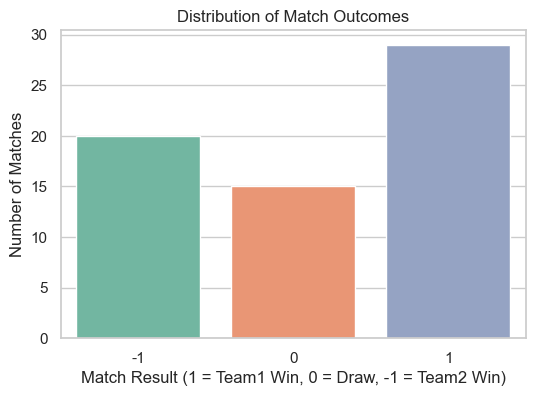

In [9]:
# Match outcome distribution: 1 = Team1 wins, 0 = Draw, -1 = Team2 wins
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='match_result', data=df, palette='Set2')
plt.title("Distribution of Match Outcomes")
plt.xlabel("Match Result (1 = Team1 Win, 0 = Draw, -1 = Team2 Win)")
plt.ylabel("Number of Matches")
plt.show()


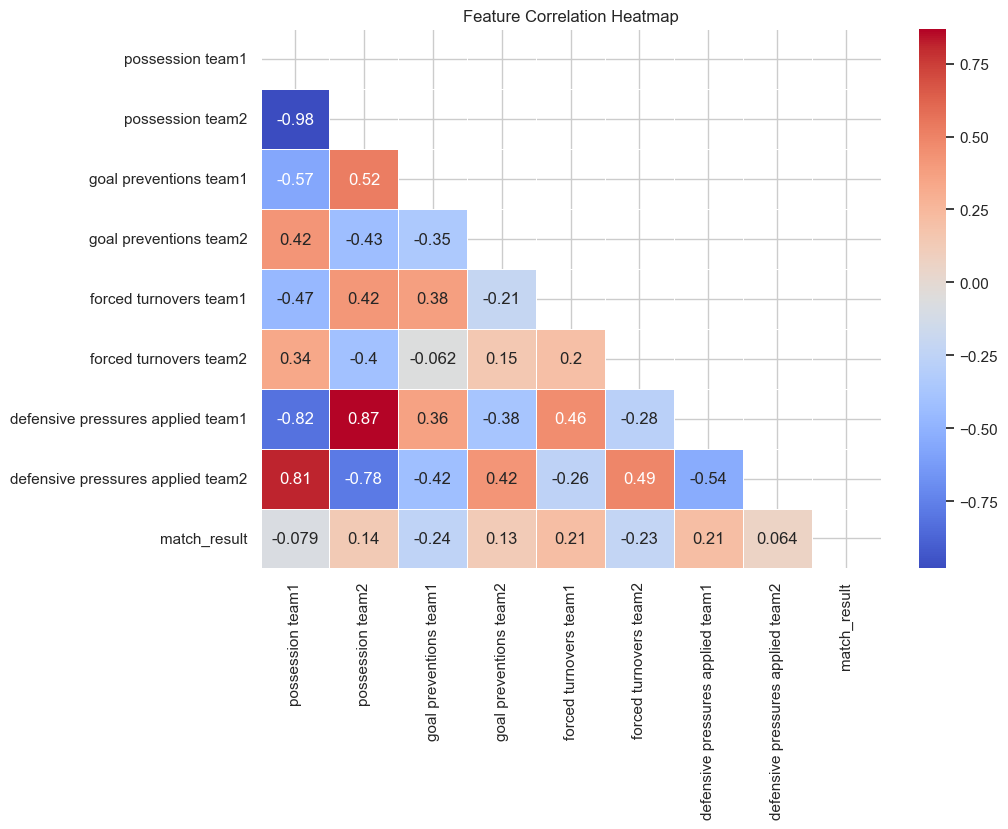

In [10]:
plt.figure(figsize=(10, 7))
correlation_matrix = df[features + ['match_result']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Feature Correlation Heatmap")
plt.show()


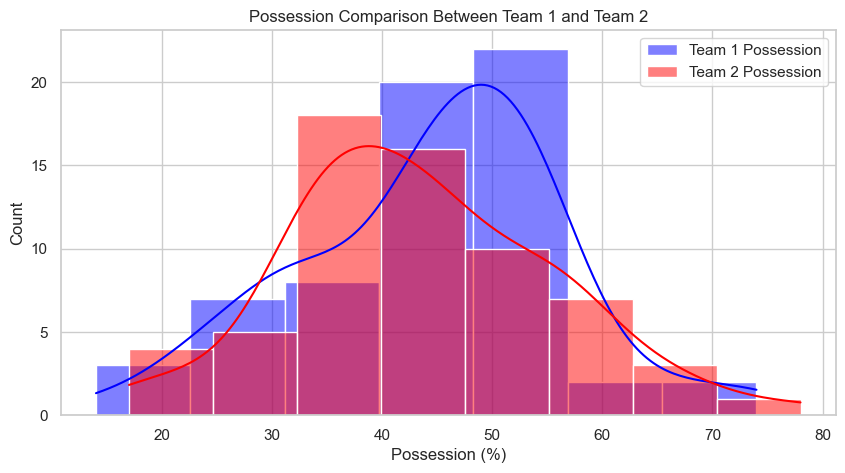

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['possession team1'], color='blue', label='Team 1 Possession', kde=True)
sns.histplot(df['possession team2'], color='red', label='Team 2 Possession', kde=True)
plt.legend()
plt.title("Possession Comparison Between Team 1 and Team 2")
plt.xlabel("Possession (%)")
plt.show()


C:\Users\aquil\AppData\Local\Temp\ipykernel_11500\1389080781.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X.columns, palette="viridis")


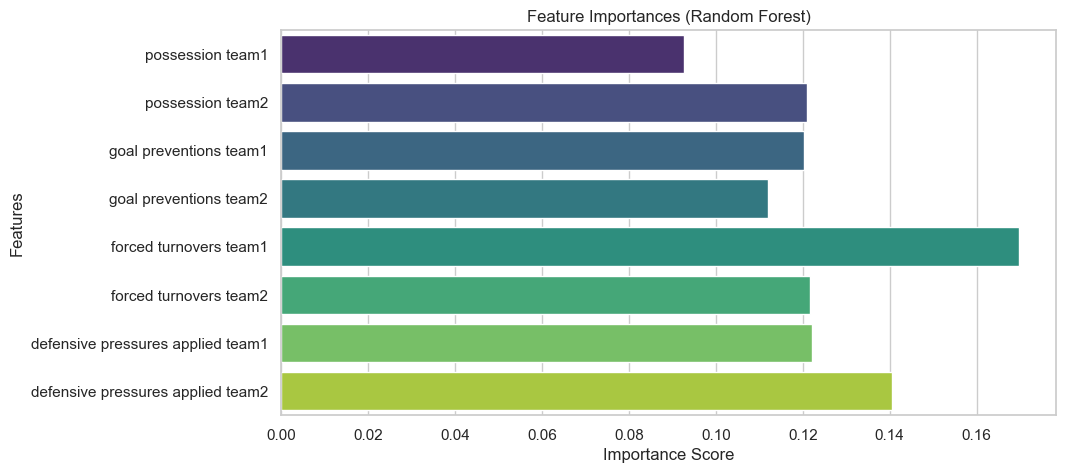

In [12]:
# Feature importance from the trained model
importances = model.feature_importances_

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=X.columns, palette="viridis")
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
